# MASTER FILE CONTAINING CODE FOR ALL DIFFERENT PIECES OF INFORMATION SCRAPED

In [1]:
# Dependencies
from splinter import Browser
from bs4 import BeautifulSoup
import pymongo
from time import sleep
import pandas as pd

#Reason for using splinter as opposed to request is:
#splinter waits for the browser to actually load the page which means content is refreshed
#whereas requests gets the response page immediately; therefore picks up whatever it hits first
#requests is used more for interaction with other servers and not for scraping
#therefore, not used here

# NOW SCRAPING LATEST NEWS TITLE AND PARAGRAPH TEXT

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports no-hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" style=""><head><script type="text/javascript" src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;callback=_ate.cbs.rcb_ezg40"></script><script type="text/javascript" src="//www.reddit.com/api/info.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;jsonp=_ate.cbs.rcb_fxcn0"></script><script type="text/javascript" src="//graph.facebook.com/?
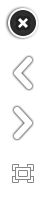
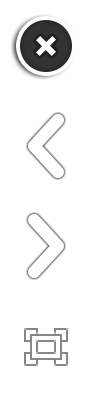
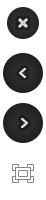
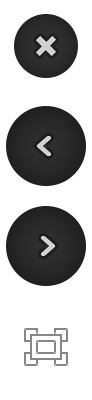
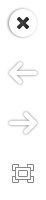
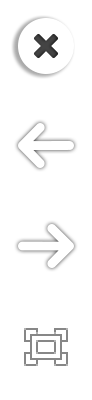
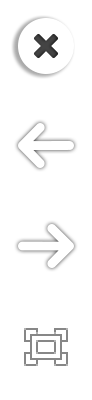
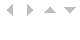

In [2]:
# URL of page to be scraped
url_mars_news = 'https://mars.nasa.gov/news/'


#As described in Cell 2, use splinter
#headless = True does not open the browser window
#use the sleep() as a good practice

browser = Browser('chrome',headless=True)
browser.visit(url_mars_news)
sleep(10)
print(browser.html)

<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports no-hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;callback=_ate.cbs.rcb_ezg40" type="text/javascript">
  </script>
  <script src="//www.reddit.com/api/info.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;jsonp=_ate.cbs.rcb_fxcn0" type="text/javascript">
  </script>
  <script src="//graph.facebook.com/?id=htt
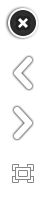
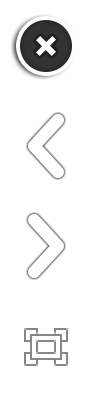
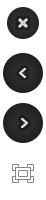
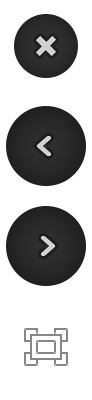
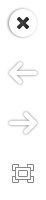
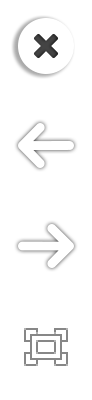
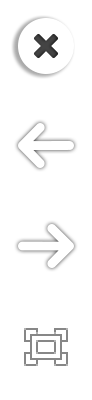
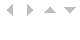

In [3]:
#Create BeautifulSoup object; parse with 'html.parser' 
    
soup = BeautifulSoup(browser.html, 'lxml')

#Examine the results, then determine element that contains sought info 
    
print(soup.prettify())


In [4]:
# results are returned as an iterable list 
    
result = soup.find('div', class_="list_text")

print(result)
 

<div class="list_text"><div class="list_date">August 23, 2019</div><div class="content_title"><a href="/news/8506/whats-mars-solar-conjunction-and-why-does-it-matter/" target="_self">What's Mars Solar Conjunction, and Why Does It Matter?</a></div><div class="article_teaser_body">NASA spacecraft at Mars are going to be on their own for a few weeks when the Sun comes between Mars and Earth, interrupting communications.</div></div>


In [5]:
news_title = result.find('div', class_="content_title").text

print(news_title)

What's Mars Solar Conjunction, and Why Does It Matter?


In [6]:
news_p = result.find('div', class_="article_teaser_body").text

print(news_p)

NASA spacecraft at Mars are going to be on their own for a few weeks when the Sun comes between Mars and Earth, interrupting communications.


# NOW SCRAPING JPL MARS SPACE IMAGE

In [7]:
# URL of page to be scraped
url_mars_jpl_image = 'https://www.jpl.nasa.gov/spaceimages/?search=&Category=Mars'

#As described in Cell 2, use splinter
#headless = True does not open the browser window
#use the sleep() as a good practice

browser = Browser('chrome',headless=True)
browser.visit(url_mars_jpl_image)
sleep(10)
print(browser.html)

<html style="" class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-"><!-- START HEADER: "DEFAULT" --><head><script type="text/javascript" src="https://v1.addthis.com/live/red_lojson/300lo.json?si=5d631fd6480f1b19&amp;bkl=0&amp;bl=1&amp;pdt=1616&amp;sid=5d631fd6480f1b19&amp;pub=&amp;rev=v8.4.12-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.jpl.nasa.gov&amp;fp=spaceimages%2F%3Fsearch%3D%26Category%3DMars&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1566777306891&amp;jsl=1&amp

In [8]:
# Create BeautifulSoup object; parse with 'html.parser' 
    
soup = BeautifulSoup(browser.html, 'lxml')

# Examine the results, then determine element that contains sought info 
    
print(soup.prettify())

<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-" style="">
 <!-- START HEADER: "DEFAULT" -->
 <head>
  <script src="https://v1.addthis.com/live/red_lojson/300lo.json?si=5d631fd6480f1b19&amp;bkl=0&amp;bl=1&amp;pdt=1616&amp;sid=5d631fd6480f1b19&amp;pub=&amp;rev=v8.4.12-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.jpl.nasa.gov&amp;fp=spaceimages%2F%3Fsearch%3D%26Category%3DMars&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1566777306891&amp;jsl=1&amp;skipb=1&amp;cal

In [9]:
# results are returned as an iterable list 
    
result = soup.find('div', class_="carousel_items")

print(result)

<div class="carousel_items">
<article alt="Mars Odyssey All Stars: Bacolor Crater" class="carousel_item" style="background-image: url('/spaceimages/images/wallpaper/PIA13664-1920x1200.jpg');">
<div class="default floating_text_area ms-layer">
<h2 class="category_title">
</h2>
<h2 class="brand_title">
				  FEATURED IMAGE
				</h2>
<h1 class="media_feature_title">
				  Mars Odyssey All Stars: Bacolor Crater				</h1>
<div class="description">
</div>
<footer>
<a class="button fancybox" data-description="Bacolor Crater is a magnificent impact feature about 20 kilometers (12 miles) wide. This image is part of an 'All Star' set marking the occasion of NASA's Mars Odyssey as the longest-working Mars spacecraft in history." data-fancybox-group="images" data-fancybox-href="/spaceimages/images/mediumsize/PIA13664_ip.jpg" data-link="/spaceimages/details.php?id=PIA13664" data-title="Mars Odyssey All Stars: Bacolor Crater" id="full_image">
					FULL IMAGE
				  </a>
</footer>
</div>
<div class="gr

In [10]:
#Extract the url for the JPL image

featured_image_url = result.find('a', class_="button fancybox")['data-fancybox-href']

#Concatenate "https://www.jpl.nasa.gov" to get the complete url

complete_jpl_image_url = "https://www.jpl.nasa.gov"+featured_image_url

print(complete_jpl_image_url)

https://www.jpl.nasa.gov/spaceimages/images/mediumsize/PIA13664_ip.jpg


# NOW SCRAPING MARS WEATHER

In [11]:
# URL of page to be scraped
url_mars_weather = 'https://twitter.com/marswxreport?lang=en'

#As described in Cell 2, use splinter
#headless = True does not open the browser window
#use the sleep() as a good practice

browser = Browser('chrome',headless=True)
browser.visit(url_mars_weather)
sleep(10)
print(browser.html)

<html lang="en" data-scribe-reduced-action-queue="true"><head>
    
    
    
    
    
    
    
    <meta charset="utf-8">
      <script async="" src="//www.google-analytics.com/analytics.js"></script><script nonce="">
        !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")>-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
      </script>
    
    
  
  <script id="bouncer_terminate_iframe" nonce="">
    if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
  <script id="ttft_boot_data" nonce="">
    window.ttftData={"transaction_id":"00631710003a0bb8.efc96541d6041341\u003c:0097e7e2001efea6","server_request_start_time":1566777321307,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_b\/1.0.1\/20190812.1754.67a1d8b","ttft_browser":"chrome"};!function(){fu

In [12]:
# Create BeautifulSoup object; parse with 'html.parser' 
    
soup = BeautifulSoup(browser.html, 'lxml')

# Examine the results, then determine element that contains sought info 
    
print(soup.prettify())

<html data-scribe-reduced-action-queue="true" lang="en">
 <head>
  <meta charset="utf-8"/>
  <script async="" src="//www.google-analytics.com/analytics.js">
  </script>
  <script nonce="">
   !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")>-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
  </script>
  <script id="bouncer_terminate_iframe" nonce="">
   if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
  <script id="ttft_boot_data" nonce="">
   window.ttftData={"transaction_id":"00631710003a0bb8.efc96541d6041341\u003c:0097e7e2001efea6","server_request_start_time":1566777321307,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_b\/1.0.1\/20190812.1754.67a1d8b","ttft_browser":"chrome"};!function(){function t(t,n){window.ttftData&&!window.ttftData[t]&&(win

In [13]:
# results are returned as an iterable list 
    
result = soup.find('div', class_="js-tweet-text-container")

print(result)

<div class="js-tweet-text-container">
<p class="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text" data-aria-label-part="0" lang="en">InSight sol 261 (2019-08-21) low -102.4ºC (-152.4ºF) high -26.6ºC (-15.8ºF)
winds from the SSE at 4.9 m/s (11.0 mph) gusting to 16.0 m/s (35.8 mph)
pressure at 7.70 hPa<a class="twitter-timeline-link u-hidden" data-pre-embedded="true" dir="ltr" href="https://t.co/MhPPOHJg3m">pic.twitter.com/MhPPOHJg3m</a></p>
</div>


In [14]:
# Extract MARS Weather

mars_weather = result.find('p', class_="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text").text

print(mars_weather)

InSight sol 261 (2019-08-21) low -102.4ºC (-152.4ºF) high -26.6ºC (-15.8ºF)
winds from the SSE at 4.9 m/s (11.0 mph) gusting to 16.0 m/s (35.8 mph)
pressure at 7.70 hPapic.twitter.com/MhPPOHJg3m


# NOW SCRAPING MARS FACTS

In [15]:
# URL of page to be scraped
url_mars_facts = 'https://space-facts.com/mars/'



In [16]:
#Pass the url to the pd.read_html() method and retrieve all tables in the url
    
all_tables = pd.read_html(url_mars_facts)
all_tables

[  Mars - Earth Comparison             Mars            Earth
 0               Diameter:         6,779 km        12,742 km
 1                   Mass:  6.39 × 10^23 kg  5.97 × 10^24 kg
 2                  Moons:                2                1
 3      Distance from Sun:   227,943,824 km   149,598,262 km
 4         Length of Year:   687 Earth days      365.24 days
 5            Temperature:    -153 to 20 °C      -88 to 58°C,
                       0                              1
 0  Equatorial Diameter:                       6,792 km
 1       Polar Diameter:                       6,752 km
 2                 Mass:  6.39 × 10^23 kg (0.11 Earths)
 3                Moons:            2 (Phobos & Deimos)
 4       Orbit Distance:       227,943,824 km (1.38 AU)
 5         Orbit Period:           687 days (1.9 years)
 6  Surface Temperature:                   -87 to -5 °C
 7         First Record:              2nd millennium BC
 8          Recorded By:           Egyptian astronomers]

In [17]:
# check the datatype of all_tables

type(all_tables)

list

In [18]:
#all_tables is a List; tables[0] is the one that contains Mars-Earth comparison
#all_tables[1] is the table that we want

#define a dataframe mars_facts_df to store the all_tables[1]

mars_facts_df = all_tables[1]
mars_facts_df.columns = ['Entity', 'Value']
mars_facts_df.head()

Entity                          Value
0  Equatorial Diameter:                       6,792 km
1       Polar Diameter:                       6,752 km
2                 Mass:  6.39 × 10^23 kg (0.11 Earths)
3                Moons:            2 (Phobos & Deimos)
4       Orbit Distance:       227,943,824 km (1.38 AU)

In [19]:
#Reset the index to "Entity"

mars_facts_df.set_index('Entity', inplace=True)

# delete the index name because of the inconsistency of display

del mars_facts_df.index.name

mars_facts_df.head()

Value
Equatorial Diameter:                       6,792 km
Polar Diameter:                            6,752 km
Mass:                 6.39 × 10^23 kg (0.11 Earths)
Moons:                          2 (Phobos & Deimos)
Orbit Distance:            227,943,824 km (1.38 AU)

In [20]:
#Create html table of the above

mars_facts_html_table = mars_facts_df.to_html()

#The scrape_mars.py does not export to a html table

mars_facts_html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Value</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Equatorial Diameter:</th>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <th>Polar Diameter:</th>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <th>Mass:</th>\n      <td>6.39 × 10^23 kg (0.11 Earths)</td>\n    </tr>\n    <tr>\n      <th>Moons:</th>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <th>Orbit Distance:</th>\n      <td>227,943,824 km (1.38 AU)</td>\n    </tr>\n    <tr>\n      <th>Orbit Period:</th>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <th>Surface Temperature:</th>\n      <td>-87 to -5 °C</td>\n    </tr>\n    <tr>\n      <th>First Record:</th>\n      <td>2nd millennium BC</td>\n    </tr>\n    <tr>\n      <th>Recorded By:</th>\n      <td>Egyptian astronomers</td>\n    </tr>\n  </tbody>\n</table>'

# NOTE - SAVING TO A HTML FILE WAS DONE PURELY TO VERIFY THE OUTPUT

In [21]:
#Save the table to an html file

mars_facts_df.to_html('mars_facts.html')

# NOW SCRAPE MARS HEMISPHERES IMAGES

In [22]:
# URL of page to be scraped
# The following url:
# 'https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
# contains a link to all 4 hemispheres. However, we need to scrape each hemisphere separately
# because each hemisphere has a separate url

url_cerberus = 'https://astrogeology.usgs.gov/search/map/Mars/Viking/cerberus_enhanced'
url_schiaparelli = 'https://astrogeology.usgs.gov/search/map/Mars/Viking/schiaparelli_enhanced'
url_syrtis_major = 'https://astrogeology.usgs.gov/search/map/Mars/Viking/syrtis_major_enhanced'
url_valles_marineris = 'https://astrogeology.usgs.gov/search/map/Mars/Viking/valles_marineris_enhanced'

#As described in Cell 2, use splinter
#headless = True does not open the browser window
#use the sleep() as a good practice

In [23]:
# Visit and scrape the url for Cerberus Enhanced Hemisphere

browser = Browser('chrome',headless=True)
browser.visit(url_cerberus)
sleep(10)
print(browser.html)

<html lang="en"><head>
		<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.4/themes/smoothness/jquery-ui.css">
<title>Cerberus Hemisphere Enhanced | USGS Astrogeology Science Center</title>
		<meta name="description" content="Mosaic of the Cerberus hemisphere of Mars projected into point perspective, a view similar to that which one would see from…">
		<meta name="keywords" content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping">
		<meta http-equiv="X-UA-Compatible" content="IE=edge">
		<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
		<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">
		<meta name="google-site-verification" content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM">
		<!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
		<link rel="stylesheet" media="screen" href="/css/main.css">
		<lin

In [24]:
# Create BeautifulSoup object; parse with 'html.parser' 
    
soup = BeautifulSoup(browser.html, 'lxml')

# Examine the results, then determine element that contains sought info 
    
print(soup.prettify())

<html lang="en">
 <head>
  <link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
  <title>
   Cerberus Hemisphere Enhanced | USGS Astrogeology Science Center
  </title>
  <meta content="Mosaic of the Cerberus hemisphere of Mars projected into point perspective, a view similar to that which one would see from…" name="description"/>
  <meta content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM" name="google-site-verification"/>
  <!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
  <link href="/css/main.css" media="screen" rel="s

In [25]:
# results are returned as an iterable list 

results_cerberus = soup.find_all('a')

print(results_cerberus)

[<a href="https://www.usgs.gov/centers/astrogeo-sc" style="float:right;margin-top:10px;">
<img alt="USGS: Science for a Changing World" class="logo" height="60" src="/images/usgs_logo_main_2x.png"/>
</a>, <a href="https://nasa.gov" style="float:right;margin-top:5px;margin-right:20px;">
<img alt="NASA" class="logo" height="65" src="/images/logos/nasa-logo-web-med.png"/>
</a>, <a href="https://pds-imaging.jpl.nasa.gov/" style="float:right;margin-top:5px;margin-right: 10px;">
<img alt="PDS Cartography and Imaging Science Node" class="logo" height="65" src="/images/pds_logo-invisible-web.png"/>
</a>, <a href="/search" style="float:right;text-decoration:none;">
<img alt="Astropedia" src="/images/astropedia/astropedia-logo-main.png" style="width:200px;border:none;float:right;"/>
<div style="clear:both;font-size:.8em;float:right;color:#888;">Lunar and Planetary Cartographic Catalog</div>
</a>, <a href="http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg

In [26]:
#When we inspect the site, we see that the <a> tag which has the title "Sample" is the one we want
#The enhanced version is a very large file (21 MB)
#Therefore parse based on the text of the <a> tag being the word "Sample" and extract the href for that <a> tag

#Define the title for identifying the Cerberus Hemisphere when it is displayed

image_cerberus_title = "Cerberus Hemisphere"
print(image_cerberus_title)

for a in results_cerberus:
    if a.text == "Sample":
        image_cerberus_url = a['href']
        print(image_cerberus_url)

Cerberus Hemisphere
http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg


In [27]:
# Visit and scrape the url for Schiaparelli Enhanced Hemisphere

browser = Browser('chrome',headless=True)
browser.visit(url_schiaparelli)
sleep(10)
print(browser.html)

<html lang="en"><head>
		<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.4/themes/smoothness/jquery-ui.css">
<title>Schiaparelli Hemisphere Enhanced | USGS Astrogeology Science Center</title>
		<meta name="description" content="Mosaic of the Schiaparelli hemisphere of Mars projected into point perspective, a view similar to that which one would see…">
		<meta name="keywords" content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping">
		<meta http-equiv="X-UA-Compatible" content="IE=edge">
		<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
		<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">
		<meta name="google-site-verification" content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM">
		<!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
		<link rel="stylesheet" media="screen" href="/css/main.css">
		<

In [28]:
# Create BeautifulSoup object; parse with 'html.parser' 
    
soup = BeautifulSoup(browser.html, 'lxml')

# Examine the results, then determine element that contains sought info 
    
print(soup.prettify())

<html lang="en">
 <head>
  <link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
  <title>
   Schiaparelli Hemisphere Enhanced | USGS Astrogeology Science Center
  </title>
  <meta content="Mosaic of the Schiaparelli hemisphere of Mars projected into point perspective, a view similar to that which one would see…" name="description"/>
  <meta content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM" name="google-site-verification"/>
  <!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
  <link href="/css/main.css" media="screen" rel

In [29]:
# results are returned as an iterable list 

results_schiaparelli = soup.find_all('a')

print(results_schiaparelli)

[<a href="https://www.usgs.gov/centers/astrogeo-sc" style="float:right;margin-top:10px;">
<img alt="USGS: Science for a Changing World" class="logo" height="60" src="/images/usgs_logo_main_2x.png"/>
</a>, <a href="https://nasa.gov" style="float:right;margin-top:5px;margin-right:20px;">
<img alt="NASA" class="logo" height="65" src="/images/logos/nasa-logo-web-med.png"/>
</a>, <a href="https://pds-imaging.jpl.nasa.gov/" style="float:right;margin-top:5px;margin-right: 10px;">
<img alt="PDS Cartography and Imaging Science Node" class="logo" height="65" src="/images/pds_logo-invisible-web.png"/>
</a>, <a href="/search" style="float:right;text-decoration:none;">
<img alt="Astropedia" src="/images/astropedia/astropedia-logo-main.png" style="width:200px;border:none;float:right;"/>
<div style="clear:both;font-size:.8em;float:right;color:#888;">Lunar and Planetary Cartographic Catalog</div>
</a>, <a href="http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full

In [30]:
#When we inspect the site, we see that the <a> tag which has the title "Sample" is the one we want
#The enhanced version is a very large file (21 MB)
#Therefore parse based on the text of the <a> tag being the word "Sample" and extract the href for that <a> tag

#Define the title for identifying the Schiaparelli Hemisphere when it is displayed

image_schiaparelli_title = "Schiaparelli Hemisphere"
print(image_schiaparelli_title)

for a in results_schiaparelli:
    if a.text == "Sample":
        image_schiaparelli_url = a['href']
        print(image_schiaparelli_url)

Schiaparelli Hemisphere
http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg


In [31]:
# Visit and scrape the url for Syrtis Major Hemisphere

browser = Browser('chrome',headless=True)
browser.visit(url_syrtis_major)
sleep(10)
print(browser.html)

<html lang="en"><head>
		<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.4/themes/smoothness/jquery-ui.css">
<title>Syrtis Major Hemisphere Enhanced | USGS Astrogeology Science Center</title>
		<meta name="description" content="Mosaic of the Syrtis Major hemisphere of Mars projected into point perspective, a view similar to that which one would see…">
		<meta name="keywords" content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping">
		<meta http-equiv="X-UA-Compatible" content="IE=edge">
		<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
		<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">
		<meta name="google-site-verification" content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM">
		<!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
		<link rel="stylesheet" media="screen" href="/css/main.css">
		<

In [32]:
# Create BeautifulSoup object; parse with 'html.parser' 
    
soup = BeautifulSoup(browser.html, 'lxml')

# Examine the results, then determine element that contains sought info 
    
print(soup.prettify())

<html lang="en">
 <head>
  <link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
  <title>
   Syrtis Major Hemisphere Enhanced | USGS Astrogeology Science Center
  </title>
  <meta content="Mosaic of the Syrtis Major hemisphere of Mars projected into point perspective, a view similar to that which one would see…" name="description"/>
  <meta content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM" name="google-site-verification"/>
  <!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
  <link href="/css/main.css" media="screen" rel

In [33]:
# results are returned as an iterable list 

results_syrtis_major = soup.find_all('a')

print(results_syrtis_major)

[<a href="https://www.usgs.gov/centers/astrogeo-sc" style="float:right;margin-top:10px;">
<img alt="USGS: Science for a Changing World" class="logo" height="60" src="/images/usgs_logo_main_2x.png"/>
</a>, <a href="https://nasa.gov" style="float:right;margin-top:5px;margin-right:20px;">
<img alt="NASA" class="logo" height="65" src="/images/logos/nasa-logo-web-med.png"/>
</a>, <a href="https://pds-imaging.jpl.nasa.gov/" style="float:right;margin-top:5px;margin-right: 10px;">
<img alt="PDS Cartography and Imaging Science Node" class="logo" height="65" src="/images/pds_logo-invisible-web.png"/>
</a>, <a href="/search" style="float:right;text-decoration:none;">
<img alt="Astropedia" src="/images/astropedia/astropedia-logo-main.png" style="width:200px;border:none;float:right;"/>
<div style="clear:both;font-size:.8em;float:right;color:#888;">Lunar and Planetary Cartographic Catalog</div>
</a>, <a href="http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full

In [34]:
#When we inspect the site, we see that the <a> tag which has the title "Sample" is the one we want
#The enhanced version is a very large file (21 MB)
#Therefore parse based on the text of the <a> tag being the word "Sample" and extract the href for that <a> tag

#Define the title for identifying the Syrtis Major Hemisphere when it is displayed

image_syrtis_major_title = "Syrtis Major Hemisphere"
print(image_syrtis_major_title)

for a in results_syrtis_major:
    if a.text == "Sample":
        image_syrtis_major_url = a['href']
        print(image_syrtis_major_url)

Syrtis Major Hemisphere
http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg


In [35]:
# Visit and scrape the url for Valles Marineris Hemisphere

browser = Browser('chrome',headless=True)
browser.visit(url_valles_marineris)
sleep(10)
print(browser.html)

<html lang="en"><head>
		<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.4/themes/smoothness/jquery-ui.css">
<title>Valles Marineris Hemisphere Enhanced | USGS Astrogeology Science Center</title>
		<meta name="description" content="Mosaic of the Valles Marineris hemisphere of Mars projected into point perspective, a view similar to that which one would…">
		<meta name="keywords" content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping">
		<meta http-equiv="X-UA-Compatible" content="IE=edge">
		<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
		<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">
		<meta name="google-site-verification" content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM">
		<!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
		<link rel="stylesheet" media="screen" href="/css/main.css">

In [36]:
# Create BeautifulSoup object; parse with 'html.parser' 
    
soup = BeautifulSoup(browser.html, 'lxml')

# Examine the results, then determine element that contains sought info 
    
print(soup.prettify())

<html lang="en">
 <head>
  <link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
  <title>
   Valles Marineris Hemisphere Enhanced | USGS Astrogeology Science Center
  </title>
  <meta content="Mosaic of the Valles Marineris hemisphere of Mars projected into point perspective, a view similar to that which one would…" name="description"/>
  <meta content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM" name="google-site-verification"/>
  <!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
  <link href="/css/main.css" media="screen"

In [37]:
# results are returned as an iterable list 

results_valles_marineris = soup.find_all('a')

print(results_valles_marineris)

[<a href="https://www.usgs.gov/centers/astrogeo-sc" style="float:right;margin-top:10px;">
<img alt="USGS: Science for a Changing World" class="logo" height="60" src="/images/usgs_logo_main_2x.png"/>
</a>, <a href="https://nasa.gov" style="float:right;margin-top:5px;margin-right:20px;">
<img alt="NASA" class="logo" height="65" src="/images/logos/nasa-logo-web-med.png"/>
</a>, <a href="https://pds-imaging.jpl.nasa.gov/" style="float:right;margin-top:5px;margin-right: 10px;">
<img alt="PDS Cartography and Imaging Science Node" class="logo" height="65" src="/images/pds_logo-invisible-web.png"/>
</a>, <a href="/search" style="float:right;text-decoration:none;">
<img alt="Astropedia" src="/images/astropedia/astropedia-logo-main.png" style="width:200px;border:none;float:right;"/>
<div style="clear:both;font-size:.8em;float:right;color:#888;">Lunar and Planetary Cartographic Catalog</div>
</a>, <a href="http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/

In [38]:
#When we inspect the site, we see that the <a> tag which has the title "Sample" is the one we want
#The enhanced version is a very large file (21 MB)
#Therefore parse based on the text of the <a> tag being the word "Sample" and extract the href for that <a> tag

#Define the title for identifying the Valles Marineris Hemisphere when it is displayed

image_valles_marineris_title = "Valles Marineris Hemisphere"
print(image_valles_marineris_title)

for a in results_valles_marineris:
    if a.text == "Sample":
        image_valles_marineris_url = a['href']
        print(image_valles_marineris_url)

Valles Marineris Hemisphere
http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg
